In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
train_dir = r"C:\Users\yashmika\OneDrive\Desktop\yoga data set\DATASET\TRAIN"
test_dir =  r"C:\Users\yashmika\OneDrive\Desktop\yoga data set\DATASET\TEST"

In [3]:
batch_size = 32
img_height = 128
img_width = 128
# Define an ImageDataGenerator for training data with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1058 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\yashmika\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf

def load_and_preprocess_images(directory):
  images = []
  labels = []
  for class_folder in os.listdir(directory):
    class_path = os.path.join(directory, class_folder)
    if os.path.isdir(class_path):
      for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
          # Load images with the correct target size (img_height, img_width)
          image = load_img(image_path, target_size=(img_height, img_width))
          image = img_to_array(image)
          image = image / 255.0  # Normalize
          images.append(image)
          labels.append(class_folder)
        except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  return np.array(images), np.array(labels)

# Load and preprocess images
train_images, train_labels = load_and_preprocess_images(train_dir)
test_images, test_labels = load_and_preprocess_images(test_dir)

# Check if train_images and train_labels are empty
if len(train_images) == 0 or len(train_labels) == 0:
  print("Error: No training images or labels found.")
  # Add debugging steps here to check train_dir, image loading, etc.
else:
  # Convert labels to numerical values
  label_to_index = {label: index for index, label in enumerate(np.unique(train_labels))}
  train_labels = np.array([label_to_index[label] for label in train_labels])
  test_labels = np.array([label_to_index[label] for label in test_labels])

  # One-hot encode labels
  train_labels = tf.keras.utils.to_categorical(train_labels)
  test_labels = tf.keras.utils.to_categorical(test_labels)

  # Split data into training and validation sets
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=42
  )

  # Train the model
  # Remove tf.function decorator from model.fit
  history = model.fit(
      train_images, train_labels,
      validation_data=(val_images, val_labels),
      epochs=10
  )

C:\Users\yashmika\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error loading image C:\Users\yashmika\OneDrive\Desktop\yoga data set\DATASET\TRAIN\tree\00000114.jpg: image file is truncated (1 bytes not processed)
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 387ms/step - accuracy: 0.2273 - loss: 1.7849 - val_accuracy: 0.2547 - val_loss: 1.5721
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.3548 - loss: 1.5110 - val_accuracy: 0.5189 - val_loss: 1.2748
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 370ms/step - accuracy: 0.5249 - loss: 1.2078 - val_accuracy: 0.5755 - val_loss: 1.1174
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.6122 - loss: 0.9636 - val_accuracy: 0.6840 - val_loss: 0.9373
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.7226 - loss: 0.8070 - val_accuracy: 0.6557 - val_loss: 0.9759
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.7765 - loss: 0.6190 - val_accuracy: 0.7075 - val_loss: 0.8885
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step - accuracy: 0.8309 - lo

In [6]:
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

C:\Users\yashmika\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7910 - loss: 0.9183
Validation Accuracy: 81.70%


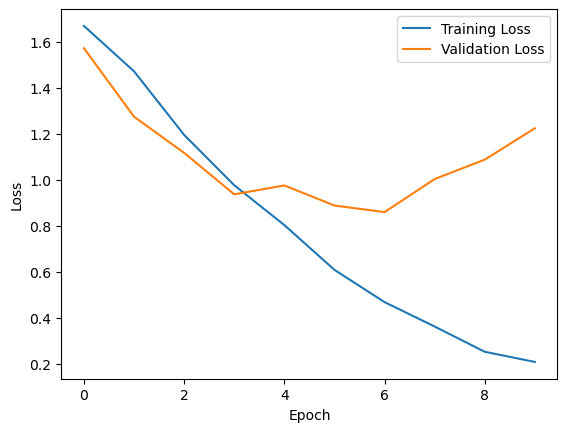

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

image_path =r"C:\Users\yashmika\Downloads\Tree-Pose-–-Vrikshasana.jpg"

img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
img.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted pose: tree


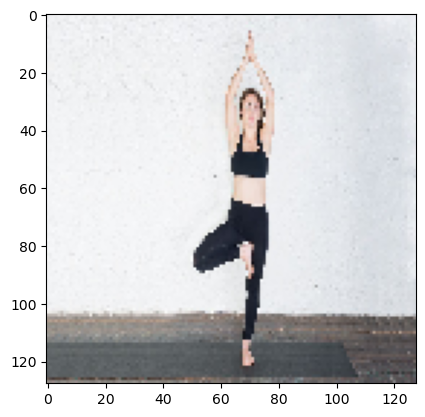

In [9]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Assuming you have a list of class names
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

print(f'Predicted pose: {class_names[predicted_class]}')

# Display input image
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [10]:
model.save('new_yoga_pose_model.keras')

In [11]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('new_yoga_pose_model.keras')

# Assuming you have a list of class names
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Resize the frame to the size the model expects
    img = cv2.resize(frame, (128, 128))
    
    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    
    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_probability = np.max(predictions[0])  # Get the highest probability

    # Format the probability to display as a percentage
    accuracy_percentage = predicted_probability * 100
    
    # Display the predicted class and its accuracy on the frame
    cv2.putText(frame, f'Predicted pose: {class_names[predicted_class]}', (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(frame, f'Accuracy: {accuracy_percentage:.2f}%', (10, 70), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame with the prediction
    cv2.imshow('Yoga Pose Detection', frame)
    
    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [ ]:
model.save('new_yoga_pose_model.keras')